# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [18]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.transforms as T
#import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [19]:
!jupyter --version
!jupyter nbextension list

!jupyter nbextension enable --py widgetsnbextension

jupyter core     : 4.6.3
jupyter-notebook : 5.7.4
qtconsole        : not installed
ipython          : 7.13.0
ipykernel        : 5.1.4
jupyter client   : 6.0.0
jupyter lab      : 1.0.9
nbconvert        : 5.6.1
ipywidgets       : not installed
nbformat         : 5.0.4
traitlets        : 4.3.3
Known nbextensions:
  config dir: /root/.jupyter/nbconfig
    notebook section
      jupyng-dist/extension  enabled 
      - Validating: OK
      workspaces-jupyter-terms-and-conditions-dist/terms_extension  enabled 
      - Validating: OK
      graffiti-dist/graffiti  enabled 
      - Validating: OK
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbextension", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.7/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instan

In [20]:
transforms = T.Compose(
    
    [   # This transforms takes a np.array or a PIL image of integers
        T.ToTensor(),
        T.Normalize((0.5), (0.5))
    ]
)

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [21]:
transforms = T.Compose(
    
    [T.ToTensor(),
     T.Normalize((0.5), (0.5))] )
    
# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST('DATA_MNIST/', download=True, train=True, transform=transforms)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transforms)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

# Create validation set and define validation dataloader
valid_set = torchvision.datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transforms)
validloader = torch.utils.data.DataLoader(valid_set, batch_size=64, shuffle=False) 

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [22]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


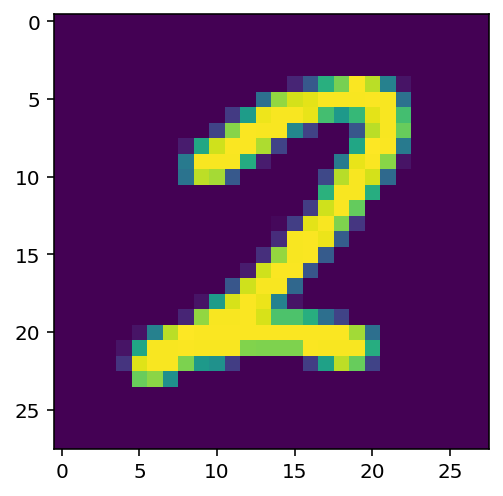

1


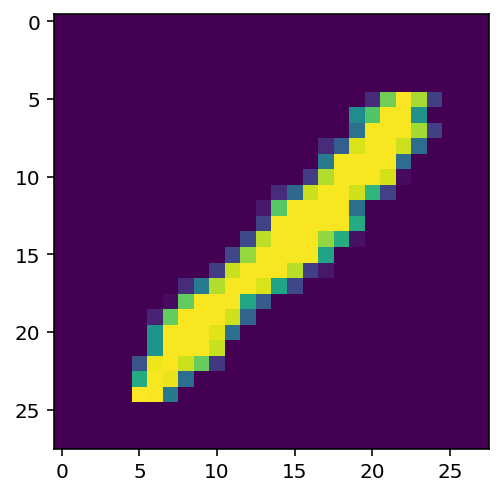

4


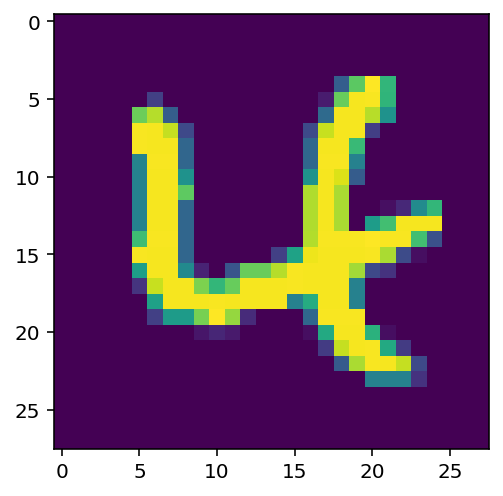

4


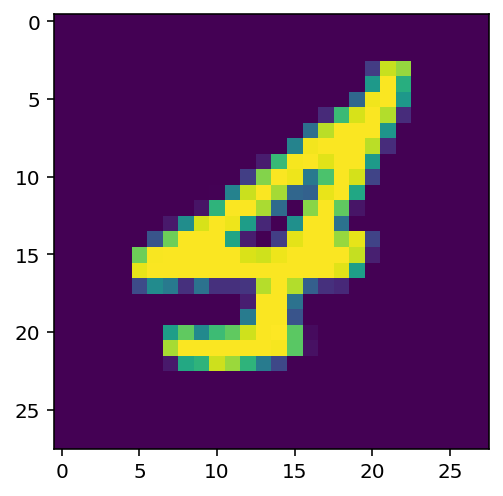

7


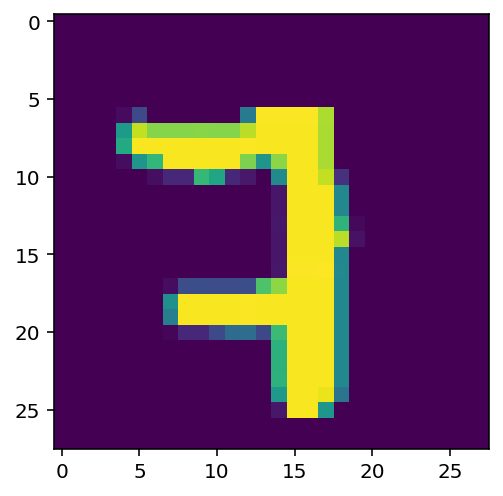

In [23]:
# obtain one batch of training images
# Show 5 images from the training loader
show5(trainloader)

2


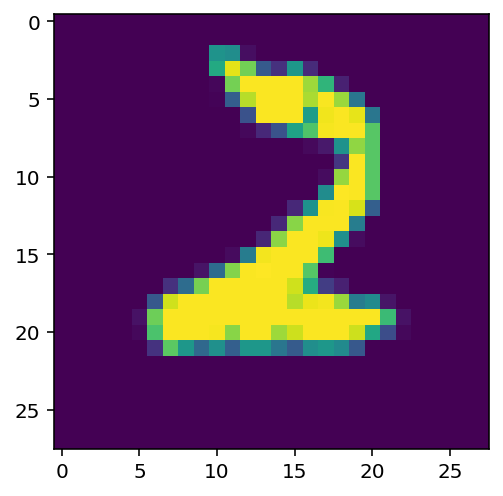

4


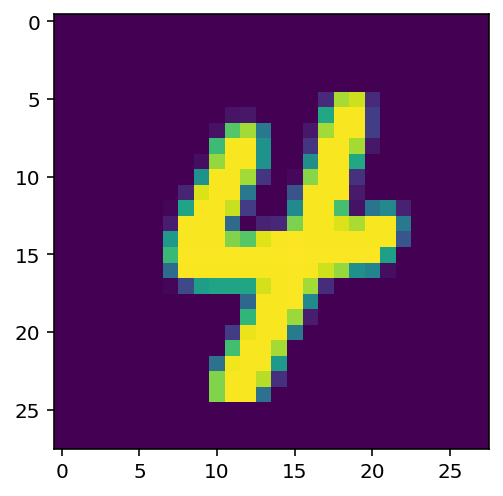

4


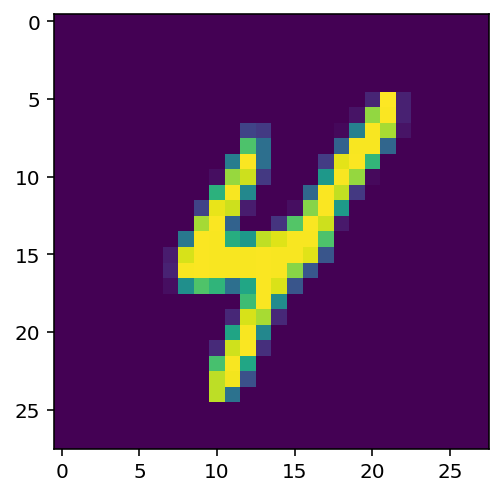

1


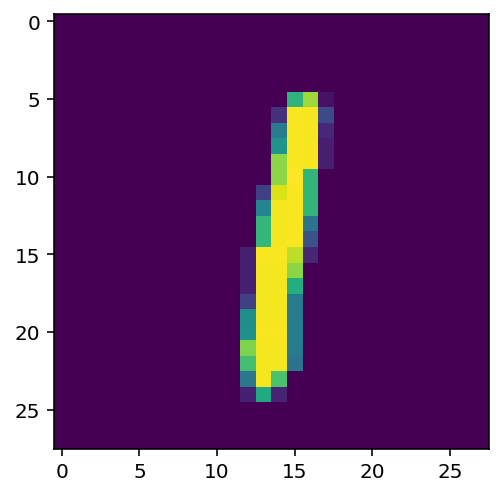

4


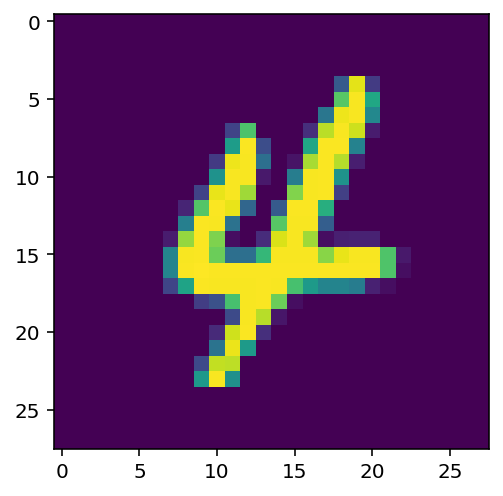

In [24]:
# Show 5 images from the test loader
show5(testloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [25]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, a_hidden_dim, b_hidden_dim, output_size):
        super(SimpleNN, self).__init__()
        
        # Define input and hidden linear layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, a_hidden_dim)
        self.fc2 = nn.Linear(a_hidden_dim, b_hidden_dim)
        
        # Final fully-connected layer
        self.fc3 = nn.Linear(b_hidden_dim, output_size)
        
        # Dropout layer 
        self.dropout = nn.Dropout(0.3)
                
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout to the hidden layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [26]:
input_size = 28 * 28
a_hidden_dim = 340
b_hidden_dim = 128
output_size = 10
model = SimpleNN(input_size, a_hidden_dim, b_hidden_dim, output_size)

In [27]:
model

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=340, bias=True)
  (fc2): Linear(in_features=340, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [28]:
import torch.optim as optim

learning_rate = 0.02
criterion = nn.CrossEntropyLoss()  # For classification tasks
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=340, bias=True)
  (fc2): Linear(in_features=340, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [29]:
# Lists to store training and validation losses
train_losses = []
valid_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    
    for batch_idx, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU if available
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        # Print loss after a set number of batches
        if batch_idx % 250 == 249:
            print(f"Epoch [{epoch+1}/{num_epochs}] - Batch [{batch_idx+1}/{len(trainloader)}] - Loss: {loss.item():.4f}")

    train_loss /= len(trainloader)
    train_losses.append(train_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}")
    
    # Validation loop
    model.eval()  # Set the model to evaluation mode
    valid_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in validloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
    
    valid_loss /= len(validloader)
    valid_losses.append(valid_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Valid Loss: {valid_loss:.4f}")

Epoch [1/50] - Batch [250/938] - Loss: 0.8446
Epoch [1/50] - Batch [500/938] - Loss: 0.4976
Epoch [1/50] - Batch [750/938] - Loss: 0.7340
Epoch [1/50] - Train Loss: 0.8236
Epoch [1/50] - Valid Loss: 0.3478
Epoch [2/50] - Batch [250/938] - Loss: 0.5645
Epoch [2/50] - Batch [500/938] - Loss: 0.4633
Epoch [2/50] - Batch [750/938] - Loss: 0.2278
Epoch [2/50] - Train Loss: 0.3778
Epoch [2/50] - Valid Loss: 0.2533
Epoch [3/50] - Batch [250/938] - Loss: 0.3943
Epoch [3/50] - Batch [500/938] - Loss: 0.1332
Epoch [3/50] - Batch [750/938] - Loss: 0.4327
Epoch [3/50] - Train Loss: 0.2969
Epoch [3/50] - Valid Loss: 0.2095
Epoch [4/50] - Batch [250/938] - Loss: 0.2062
Epoch [4/50] - Batch [500/938] - Loss: 0.1835
Epoch [4/50] - Batch [750/938] - Loss: 0.4137
Epoch [4/50] - Train Loss: 0.2491
Epoch [4/50] - Valid Loss: 0.1779
Epoch [5/50] - Batch [250/938] - Loss: 0.1960
Epoch [5/50] - Batch [500/938] - Loss: 0.1797
Epoch [5/50] - Batch [750/938] - Loss: 0.3299
Epoch [5/50] - Train Loss: 0.2174
Epoc

# Lists to store training and validation losses
train_losses = []
valid_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    train_loss /= len(trainloader)
    train_losses.append(train_loss)

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    valid_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in validloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
    
    valid_loss /= len(validloader)
    valid_losses.append(valid_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f} - Valid Loss: {valid_loss:.4f}")

Plot the training loss (and validation loss/accuracy, if recorded).

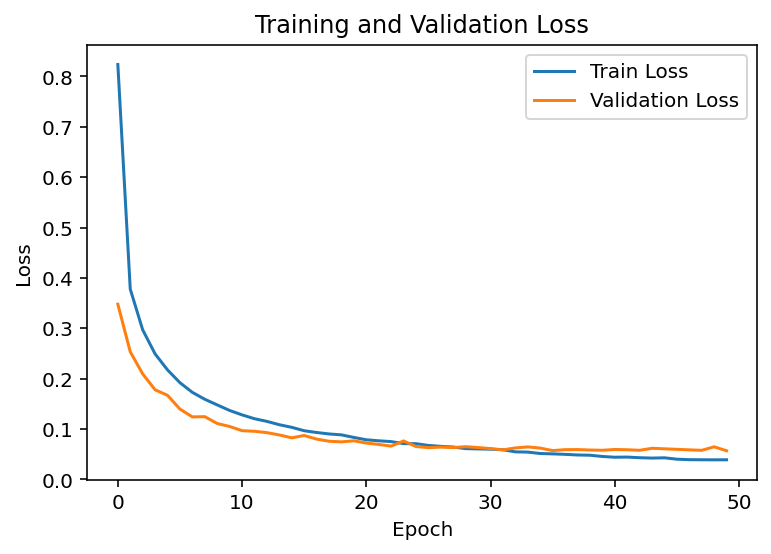

In [30]:
# Plot the loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [31]:
model.eval()  # Switch to evaluation mode
with torch.no_grad():
    total_correct = 0
    total_samples = 0
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    accuracy = total_correct / total_samples
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9828


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [32]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [33]:
# Save the trained model
torch.save(model.state_dict(), 'simple_nn_model.pth')
print("Model saved!")

Model saved!


In [34]:
# Later, to load the saved model
model = SimpleNN(input_size, a_hidden_dim, b_hidden_dim, output_size)  # Create an instance of the model
model.load_state_dict(torch.load('simple_nn_model.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded!")

Model loaded!
